In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from random import randint

In [2]:
with open("./data_inputs/day15_input.txt") as f:
    input = f.read()

In [3]:
cave_map = np.array([list(map(int, list(line))) for line in input.split("\n")], dtype=np.uint8)

In [4]:
cave_map[0, 0] = 0
cave_map[99, 99] = 0

In [5]:
def plot_map(cave_map, paths):

    i = 0
    map_path = np.copy(cave_map)
    for path in paths:
        for p in path:
            map_path[p[0], p[1]] = (20 + i*5)
        i += 1
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.imshow(map_path)

In [6]:
if 'paths' not in locals():
    paths = []

if 'risks' not in locals():
    risks = []

def path_risk(path):
    return sum([cave_map[p[0], p[1]] for p in path])

def add_paths(path):
    if path not in paths:
        paths.append(path)
        risks.append(path_risk(path))
        #print(risks[-1])
    else:
        print("Path already exists")

In [7]:
start = (0, 0)
finish = (99, 99)

movs_dict = dict(
    up = (-1, 0),
    down = (1, 0),
    left = (0, -1),
    right = (0, 1),
)


In [8]:
def valid_movs(pos):

    movs = movs_dict.copy()
    if pos[0] == 0:
        movs.pop("up")
    if pos[0] == cave_map.shape[0] - 1:
        movs.pop("down")
    if pos[1] == 0:
        movs.pop("left")
    if pos[1] == cave_map.shape[1] - 1:
        movs.pop("right")
    
    return movs

In [9]:
[randint(-2, 2) for i in range(10)]

[1, 1, 0, 2, 0, 0, 2, 2, 0, -1]

In [11]:
def next_mov(pos, path, objective):
    movs = valid_movs(pos)
    close_pos = [(pos[0] + mov[0], pos[1] + mov[1]) for _, mov in movs.items()]
    close_pos = [p for p in close_pos if p not in path]
    down_right = [(pos[0] + mov[0], pos[1] + mov[1]) for direction, mov in movs.items() if direction in ["down", "right"]]
    up_left = [(pos[0] + mov[0], pos[1] + mov[1]) for direction, mov in movs.items() if direction in ["up", "left"]]
    #print("down_right:", down_right)
    risks = [[close_pos, cave_map[close_pos]] for close_pos in close_pos]
    #print("risks:", risks)
    for r in risks:
       r[1] += randint(-2, 3)
    
    if objective == "finish":
        if down_right:
            for p in down_right:
                for r in risks:
                    if r[0] == p:
                        r[1] -= 8
                        
    elif objective == "start":
        if up_left:
            for p in up_left:
                for r in risks:
                    if r[0] == p:
                        r[1] -= 8
    #print("risks_slope:", risks)

    if not risks:
        #print("not_risk", pos)
        return None
        
    return min(risks, key = lambda x: x[1])[0]



In [12]:
low_map_positions = []

for x in range(100):
    for y in range(100):
        if cave_map[x, y] < 2:
            low_map_positions.append((x, y))


In [13]:
len(low_map_positions)

949

In [100]:
lowest_risk = 10000
lowest_path = []
lowest_start = (-1, -1)
fails = 0
test_paths = []
test_risks = []

for i in range(50000):
    total_risk = 0
    total_movements = 0
    pos = start
    path = []
    fail = False
    dual_path = True

    if dual_path:
        start_pos = low_map_positions[randint(0, len(low_map_positions) - 1)]
        pos = start_pos
        
        while not fail and pos != start and total_movements < 500:
    
            next_pos = next_mov(pos, path, "start")
            if not next_pos:
                fail = True
                fails += 1
                break
            path.append(next_pos)
            total_risk += cave_map[next_pos]
            total_movements += 1
            pos = next_pos

        if not fail:
            total_risk += cave_map[start_pos]
            path.append(start_pos)
            path.remove(start)
    
    pos = start_pos
    while not fail and pos != finish and total_movements < 500:

        next_pos = next_mov(pos, path, "finish")
        if not next_pos:
            fail = True
            fails += 1
            break
        path.append(next_pos)
        total_risk += cave_map[next_pos]
        total_movements += 1
        pos = next_pos
    
    total_risk += 8

    #test_paths.append(path)
    #test_risks.append(total_risk)
    
    if total_risk < lowest_risk and not fail:
        lowest_risk = total_risk
        lowest_path = path.copy()
        lowest_start = start_pos

    #print("total_risk:", total_risk)
    #if path_risk(path) < 1000:
    #    add_paths(path)
    #else:
    #    print("Path not saved, too high risk")

add_paths(lowest_path)

print("lowest_risk:", lowest_risk)
print("fails:", fails)
print("lowest_start:", lowest_start)

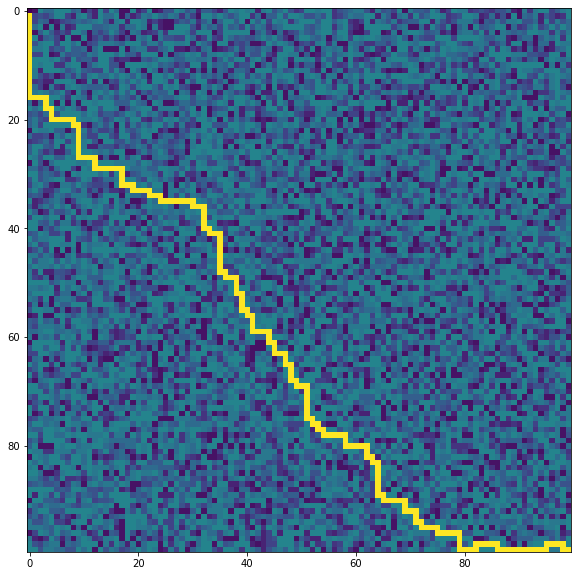

In [99]:
plot_map(cave_map, [paths[-1]])

In [81]:
risks

[926,
 889,
 907,
 929,
 999,
 995,
 943,
 968,
 956,
 896,
 1221,
 831,
 833,
 879,
 830,
 843,
 850,
 846,
 843,
 920,
 849]

In [82]:
len(paths)

21